# Lab 2b Data Analysis #


## Instructions: ##

### 1. Plot Absorption Spectra for P5, P7, and P9 dyes ###

Using the code from last week as examples, plot absorption spectra for the P5, P7, and P9 dyes that you measured this week in lab. Don't forget to
1. Import Matplotlib and Numpy
2. Set the default Matplotlib fontsize to 16
3. Use np.loadtxt() to import the %T data, naming the imported data arrays `dat5`, `dat7`, and `dat9` (for P5, P7, and P9). 
4. Multiply your %T data by 0.01 to convert to fractional T data
5. Convert your fractional T data to absorbance using the -np.log10() function
6. Label both x- and y-axes!

In the figure, color the P5 curve blue, the P7 curve gree, and the P9 curve red. 

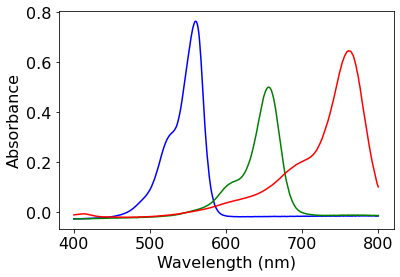

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', size=16) 

dat9 = np.loadtxt('Lab2b/P9.csv', delimiter=',')
dat7 = np.loadtxt('Lab2b/P7.csv', delimiter=',')
dat5 = np.loadtxt('Lab2b/P5.csv', delimiter=',')
plt.plot(dat5[:,0], -np.log10(dat5[:,1]*0.01), 'b')
plt.plot(dat7[:,0], -np.log10(dat7[:,1]*0.01), 'g')
plt.plot(dat9[:,0], -np.log10(dat9[:,1]*0.01), 'r')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')

plt.show()


### 2. Identify peak absorbance wavelengths  ###

Next, identify the maximum absorbance wavelength for each dye molecule. To make this easy, I've defined below a simple Python *function* that takes two arguments, ``x`` and ``y`` and finds the value in ``x`` that corresponds to the maximum value of ``y``. (Be sure to execute the cell by clicking on it and hitting <Shift + Enter>!) You don't need to modify this cell block, but let's pause for a moment to explain what's going on. 

* The ``def`` command tells Python that we're about to define a new function. Using such `def` commands, we can define functions that do all sorts of things and often avoid repeating the same code over and over again. 

* The text in blue immediately following the `def` command is the *name* of the function, in this case `find_peak`. This is the text we'll type in our programs when we want to call the function. When you define new functions, you can name them anything you want (even `dog` or `cat`), but it's always a good idea to name them something that will help you remember what they actually do!

* Inside the function, the numpy function `np.argmax` finds the *index* at which the vector `y` achieves its maximal value. (The prefix "arg" indicates that the function will return the *index* rather than the *value* of the maximum.) 

* The `return` command tells the compiler what value the function should return when it's called in a script. In this case, it will return the value from the x-axis (the `x` vector) stored at the index `ndxmax` where the `y` vector is at a maximum. 


In [15]:
def find_peak(x, y):
    ndxmax = np.argmax(y)
    return x[ndxmax]

If we now apply this function to our absorption data, it will *return* the wavelength value where each absorption spectrum is at a maximum. 

In [17]:
# Assuming your %T data is stored in the three arrays dat5, dat7, and dat9
# l5 will store the wavelength of maximum absorption for P5,
# l7 will store the wavelength of maximum absorption for P7, and
# l9 will store the wavelength of maximum absorption for P9. 

l5 = find_peak(dat5[:,0], -np.log10(dat5[:,1]*0.01))
l7 = find_peak(dat7[:,0], -np.log10(dat7[:,1]*0.01))
l9 = find_peak(dat9[:,0], -np.log10(dat9[:,1]*0.01))

# Print the values: 
print('P5 peak absorption wavelength: ', l5, ' nm')
print('P7 peak absorption wavelength: ', l7, ' nm')
print('P9 peak absorption wavelength: ', l9, ' nm')

P5 peak absorption wavelength:  559.999939  nm
P7 peak absorption wavelength:  655.9827271  nm
P9 peak absorption wavelength:  761.0080566  nm


Do the reported peak absorption wavelengths seem to correspond to what you see in your graph? If not, there's a problem!

### 3. Convert Wavelength to Frequency

Next, since our calculations refer to the *frequency* of the electronic dynamics, convert wavelength to frequency using the formula
$$\nu = \frac{c}{\lambda}$$
where $c$ is the speed of light. In the code block below, the first line defines a new variable `c` that stores the value of the speed of light in m/s. In the second line, a new variable `f5` is defined that stores the peak absorption frequency of the P5 dye, calculated using the formula above. (Note that since our wavelength axis is in nm, we have to multiply by $10^{-9}$ to convert to meters.) 

Using this code as an example, add two more lines to the cell block defining variables `f7` and `f9` that store peak absorption frequencies for the P7 and P9 dye molecules. 

In [18]:
c = 2.9979e+8   # m/s
f5 = c / (l5*1e-9)

535339344028035.7 457008984558672.8 393938010774011.0


### 4. Calculate the corresponding quantum particle-in-a-box frequencies ###

Finally, let's compare your experimental peak frequencies with the calculated frequencies using the quantum particle-in-a-box model. In the cell block below, enter in the lines starting `L1 = `, `L2 =`, and `L3 =`, the three box-lengths you measured in Part 6 for *each* of the three different definitions of box length (L1, L2, and L3) *and* each dye molecule. (E.g., there should be three values in L1, corresponding to the L1 length of P5, P7, and P7). 

Once your length measurements are entered, the code can be executed. It will plot the experimental frequencies for each dye (x-axis) against the calculated values using the quantum particle-in-a-box model and each of the three L values you measured. Which data set gives the best agreement? 

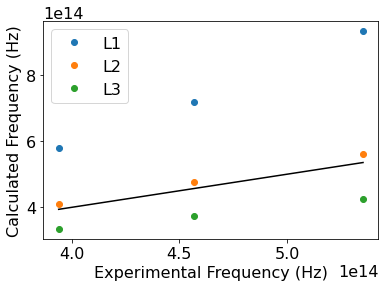

In [43]:
# This array holds the experimental peak frequencies you just calculated
exp_freqs = np.array([f5, f7, f9])

# These three arrays hold the lengths you measured for each of the three dye molecules
L1 = np.array([9.37, 11.81, 14.27])*(1e-10)
L2 = np.array([12.06, 14.50, 16.95])*(1e-10)
L3 = np.array([13.89, 16.33, 18.79])*(1e-10)

# NC is the number of C atoms in each dye chain 
NC = np.array([5, 7, 9])

# Ne is the number of electrons in each pi system
Ne = NC + 3

# Planck's constant
h = 6.626e-34  # J*s

# The electron mass
m = 9.11e-31   # kg

# Calculated particle-in-a-box frequencies
L1freqs = h*(Ne + 1)/(8*m*L1**2)
L2freqs = h*(Ne + 1)/(8*m*L2**2)
L3freqs = h*(Ne + 1)/(8*m*L3**2)

plt.plot(exp_freqs, L1freqs,'o', label='L1')
plt.plot(exp_freqs, L2freqs,'o', label='L2')
plt.plot(exp_freqs, L3freqs,'o', label='L3')
plt.plot(exp_freqs, exp_freqs, 'k-')
plt.legend()

plt.xlabel('Experimental Frequency (Hz)')
plt.ylabel('Calculated Frequency (Hz)')
plt.show()


#### Question 1: 

In the classical particle-in-a-box simulation, how does changing the box length alter the time it takes each particle to travel across the box? 

#### Question 2: 

In the classical particle-in-a-box simulation with 5000 particles, what seems to be the most common round-trip frequency? Why do you think this is the most common value? 

#### Question 3: 

How does the most common round-trip frequency for the classicle particle-in-a-box simulation compare with the *measured* absorption frequencies from the experiment? What does this comparison tell you about classical models for electronic motion? 

#### Question 4: 

In the *quantum* particle-in-a-box calculation, which definition of box length gives the best agreement against experimental data? Why do you think this might be physically? 

#### Question 5: 

Based on the values you measured for P5, P7, and P9, roughly what do you think would be the best "box length" to estimate the absorption frequency of the P3 dye (i.e., with three carbons between the two nitrogens)? In the code block below, calculate (and print!) the absorption frequency you would expect for this dye. What peak absorption wavelength does this correspond to? What color do you think this dye would be in solution? 

In [48]:
# Type your code here

f = h*(6 + 1)/(8*m*(9.5e-10)**2)
print(f, c/(f*1e-9))

705170112293270.0 425.1314608684403


#### Question 6: 

Using the `find_peak` function defined above as an example, define a new function `calc_square(x)` in the code block below that calculates the square of a number `x`. Verify that it works by using it to calculate $x^2$ with $x$ equal to 2, 5, and 10. (Be sure to print the results each time using the `print()` command.) 


In [49]:
def calc_square(x):
    return x*x

print(calc_square(2))
print(calc_square(5))
print(calc_square(10))

4
25
100


### 5. Submit! 

As usual, download your notebook as a PDF by selecting File > Download As > PDF via Latex (.pdf) from the dropdown menu at the top right of this window. Then upload the PDF under the Lab1 assignment on the Brightspace page **for your lab section**. <br>
